In [30]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 메모리
import gc

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수 사용

def resumetable(df, n):
    print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
    summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
    summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

    summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
    summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산
    
    for i in range(n):
        summary[f"{i+1}번째 값"] = df.iloc[i].values
    
    return summary                                                     # 요약 테이블 반환

In [4]:
# 불필요한 컬럼 drop 후 메인 데이터 읽어오기
df = pd.read_csv('data/결측치처리_변환추가.csv')

In [15]:
df_raw = pd.read_csv('data/kyrbs2024_수정.csv')

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
resumetable(df,3)

데이터셋 크기: (54653, 79)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값
0,OBS,object,0,54653,A100001,A100002,A100003
1,조사연도,float64,0,1,2024.0,2024.0,2024.0
2,시도,object,0,17,서울,서울,서울
3,도시규모,object,0,3,대도시,대도시,대도시
4,학교구분,object,0,2,중학교,중학교,중학교
5,학교유형,object,0,3,남녀공학,남녀공학,남녀공학
6,지역군,object,0,49,서울대4-3,서울대4-3,서울대4-3
7,주관적_건강_인지,float64,0,5,1.0,1.0,1.0
8,주관적_체형_인지,float64,0,5,2.0,4.0,3.0
9,평생_흡연_경험,float64,0,2,1.0,1.0,1.0


---

## H6 : 전자담배 사용자는 흡연 광고 노출 경험이 많다.

In [21]:
# 담배광고_없음이 5.0이면 '광고 안 봄', 아니면 '광고 봄'으로 표시
df['광고_노출여부'] = df['담배광고_없음'].apply(lambda x: '광고 노출 경험 없음' if x == 5.0 else '광고 노출 경험 있음')

In [22]:
df['변환_전자담배_경험'].value_counts()

변환_전자담배_경험
False    51028
True      3625
Name: count, dtype: int64

In [23]:
# 전자담배 경험자와 비경험자 나누기
users = df[df['변환_전자담배_경험'] == 1]
non_users = df[df['변환_전자담배_경험'] == 0]

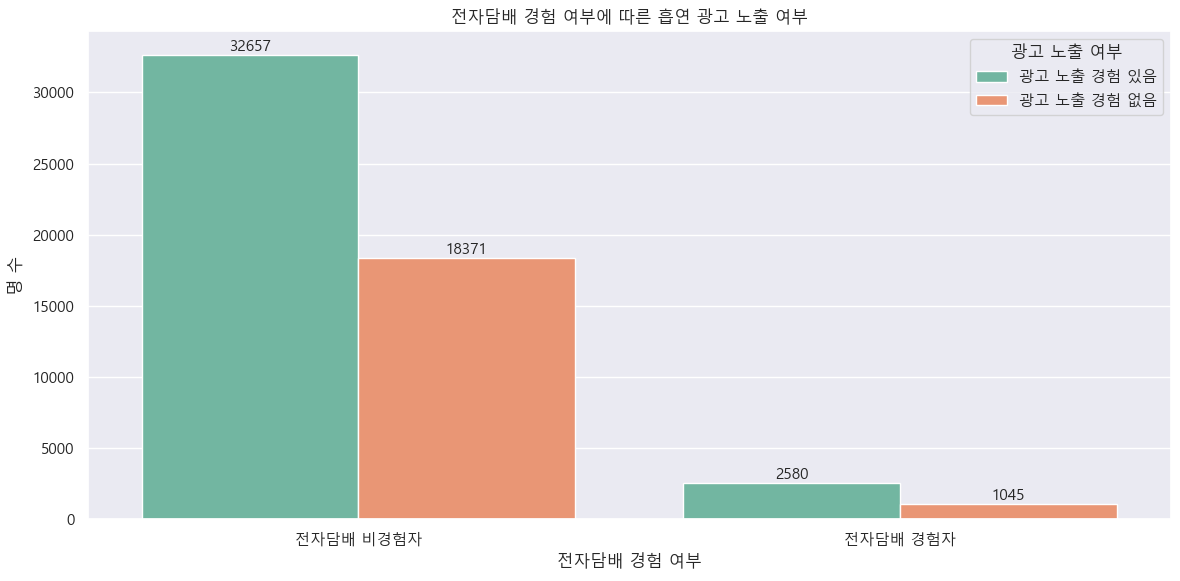

In [43]:
ax = sns.countplot(
    data=df,
    x='변환_전자담배_경험',
    hue='광고_노출여부',
    palette='Set2'
)

plt.xticks([0, 1], ['전자담배 비경험자', '전자담배 경험자'])
plt.xlabel('전자담배 경험 여부')
plt.ylabel('명 수')
plt.title('전자담배 경험 여부에 따른 흡연 광고 노출 여부')
plt.legend(title='광고 노출 여부', loc='upper right')

# 라벨링 추가
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',  # 정수로 변환
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

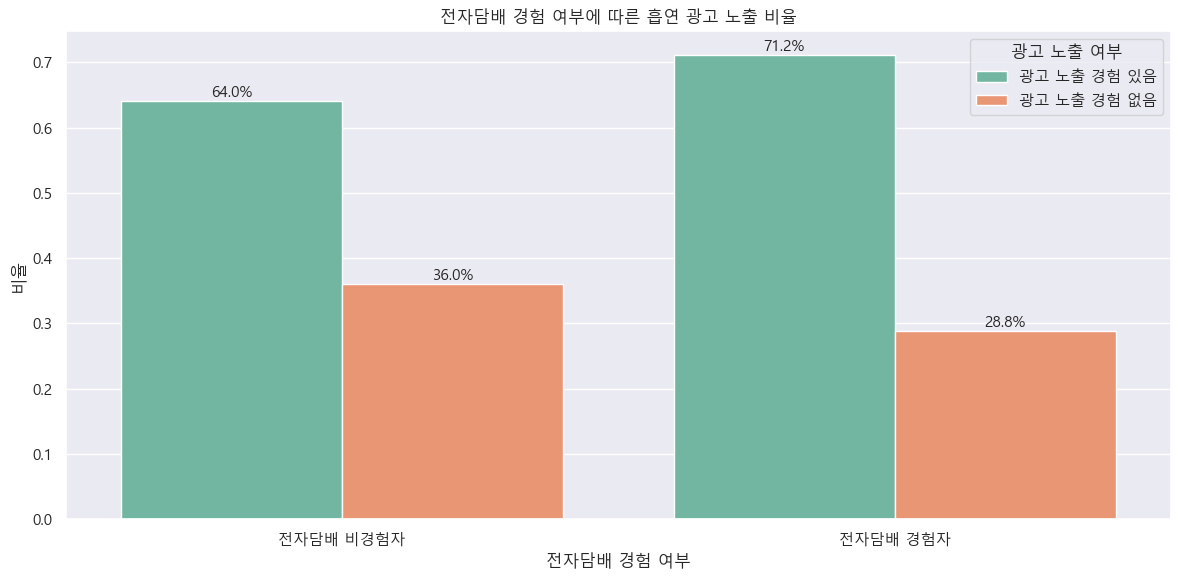

In [46]:
ax = sns.barplot(
    data=ratio_melted,
    x='변환_전자담배_경험',
    y='비율',
    hue='광고_노출여부',
    palette='Set2',
    hue_order=['광고 노출 경험 있음', '광고 노출 경험 없음']
)

ax.set_xticklabels(['전자담배 비경험자', '전자담배 경험자'])

# 백분율 라벨 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.01:
            ax.annotate(f'{height*100:.1f}%',
                        (bar.get_x() + bar.get_width()/2, height),
                        ha='center', va='bottom', fontsize=11)

plt.xlabel('전자담배 경험 여부')
plt.ylabel('비율')
plt.title('전자담배 경험 여부에 따른 흡연 광고 노출 비율')
plt.legend(title='광고 노출 여부')
plt.tight_layout()
plt.show()

- 전자담배 사용자일수록 흡연 광고 노출 경험이 많다 : True

---

## H8 : 전자담배 사용자는 흡연 장소와 구매 경로가 일반담배 사용자와 다르다.